TypeError: Invalid shape (22, 255, 255, 3) for image data

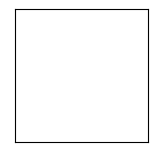

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load the Food101 dataset from TensorFlow Datasets without downloading
ds_train, info = tfds.load('food101', split='train', as_supervised=True, with_info=True, download=True)

# Take a subset of the dataset (e.g., 100 examples) for faster loading (adjust as needed)
subset_size = 1000
ds_train = ds_train.take(subset_size)

# Normalize pixel values to be between 0 and 1 and resize images to 255x255 pixels
def preprocess_image(image, label):
    image = tf.image.resize(image, (255, 255))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Filter images with labels "76" (tacos) or "96" (pizza)
ds_train_filtered = ds_train.filter(lambda image, label: tf.math.logical_or(label == 76, label == 96))

# Split the filtered dataset into train and test sets
split_ratio = 0.8
total_samples = 255
train_samples = int(total_samples * split_ratio)
ds_train = ds_train_filtered.take(train_samples)
ds_test = ds_train_filtered.skip(train_samples)

ds_train = ds_train.map(preprocess_image).shuffle(buffer_size=1000).batch(batch_size)
ds_test = ds_test.map(preprocess_image).batch(batch_size)

In [6]:
ds_train_filtered

<_MapDataset element_spec=(TensorSpec(shape=(255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
# Step 1: Load and preprocess the dataset

# Split the dataset into train and test sets
split_ratio = 0.8

total_samples = 255
train_samples = int(total_samples * split_ratio)
test_samples = total_samples - train_samples

ds_train = ds_train_filtered.take(train_samples)
ds_test = ds_train_filtered.skip(train_samples)

# Take a subset of the dataset for each epoch
#ds_train = ds_train.take(subset_size)

def preprocess_image(image, label):
    image = tf.image.resize(image, image_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply data preprocessing
ds_train = ds_train.map(preprocess_image).shuffle(buffer_size=1000).batch(batch_size)
ds_test = ds_test.map(preprocess_image).batch(batch_size)

# Step 3: Define the Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(101, activation='softmax')  # Multi-class classification output layer
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Step 5: Train the Model
epochs = 10
model.fit(ds_train, epochs=epochs)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 4.6151 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 4.5630 - accuracy: 0.5909
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 4.4091 - accuracy: 0.5909
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 4.0679 - accuracy: 0.5909
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 3.4489 - accuracy: 0.5909
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 2.5101 - accuracy: 0.5909
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 1.7203 - accuracy: 0.5909
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 1.8219 - accuracy: 0.5909
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 1.7787 - accuracy: 0.5909
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 1.4110 - accuracy: 0.5909


OverflowError: cannot convert float infinity to integer

In [4]:
# Change epochs to 20


# Step 1: Prepare the Dataset (Assuming you have the food101 dataset)
dataset_name = 'food101'
image_size = (150, 150)
batch_size = 100
subset_size = 10000  # Set the size of the subset you want to use for each epoch

# Step 2: Load and preprocess the dataset
(ds_train, ds_test), info = tfds.load(dataset_name, split=['train', 'validation'], as_supervised=True, with_info=True)

# Take a subset of the dataset for each epoch
ds_train = ds_train.take(subset_size)

def preprocess_image(image, label):
    image = tf.image.resize(image, image_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply data preprocessing
ds_train = ds_train.map(preprocess_image).shuffle(buffer_size=1000).batch(batch_size)
ds_test = ds_test.map(preprocess_image).batch(batch_size)

# Step 3: Define the Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(101, activation='softmax')  # Multi-class classification output layer
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Step 5: Train the Model
epochs = 20
steps_per_epoch = subset_size // batch_size  # Limit the data used for each epoch
model.fit(ds_train, epochs=epochs, steps_per_epoch=steps_per_epoch)

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/20
100/100 [==============================] - 141s 1s/step - loss: 4.6148 - accuracy: 0.0119
Epoch 2/20
100/100 [==============================] - 141s 1s/step - loss: 4.5079 - accuracy: 0.0301
Epoch 3/20
100/100 [==============================] - 139s 1s/step - loss: 4.2916 - accuracy: 0.0619
Epoch 4/20
100/100 [==============================] - 138s 1s/step - loss: 4.0703 - accuracy: 0.0911
Epoch 5/20
100/100 [==============================] - 138s 1s/step - loss: 3.7685 - accuracy: 0.1357
Epoch 6/20
100/100 [==============================] - 139s 1s/step - loss: 3.3005 - accuracy: 0.2195
Epoch 7/20
100/100 [==============================] - 137s 1s/step - loss: 2.6993 - accuracy: 0.3418
Epoch 8/20
100/100 [==============================] - 141s 1s/step - loss: 2.0424 - accuracy: 0.4847
Epoch 9/20
100/100 [==============================] - 140s 1s/step - loss: 1.5014 - accuracy: 0.6145
Epoch 10/20
100/100 [==============================] - 139s 1s/step - loss: 1.0608 - accura